<a href="https://colab.research.google.com/github/ApolosContreras/ApolosContreras/blob/main/perro_y_gato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf

In [3]:
carpeta = '/content/drive/MyDrive/datasets/perro y gato/entrenamiento/garfield'

In [4]:
len(carpeta)

67

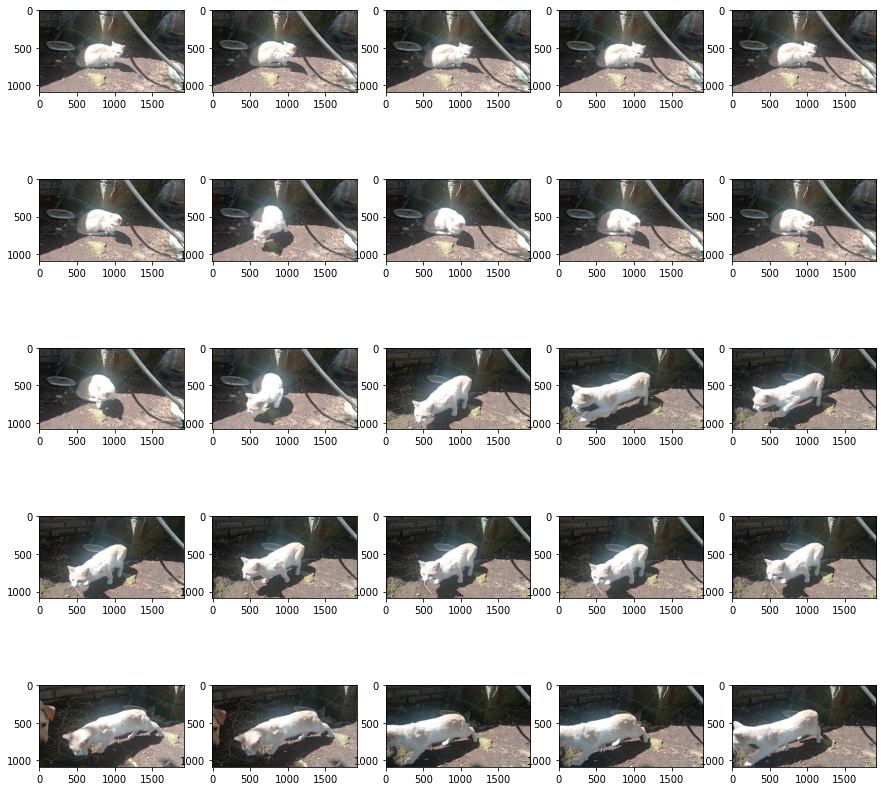

In [5]:
  #Mostrar algunas imagenes con pyplot
  import os
  import matplotlib.pyplot as plt
  import matplotlib.image as mpimg

  plt.figure(figsize=(15,15))


  imagenes = os.listdir(carpeta)

  for i, nombreimg in enumerate(imagenes[:25]):
    plt.subplot(5,5,i+1)
    imagen = mpimg.imread(carpeta + '/' + nombreimg)
    plt.imshow(imagen)

In [6]:
carpetaa= '/content/drive/MyDrive/datasets/perro y gato/entrenamiento/pecas'

In [7]:
len(carpetaa)

64

In [8]:
  from tensorflow.keras.preprocessing.image import ImageDataGenerator
  import numpy as np


In [9]:
  train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.8,
      horizontal_flip=True
      )

In [10]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
entrenamiento_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/datasets/perro y gato/entrenamiento',
                                 target_size=(200,200),
                                 batch_size=32,
                                 shuffle=True,
                                 
                                 )

prueba_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/datasets/perro y gato/prueba',
                                 target_size=(200,200),
                                 batch_size=32,                                                            
                                 )

Found 867 images belonging to 2 classes.
Found 216 images belonging to 2 classes.


In [12]:
len(entrenamiento_generator)

28

In [13]:
test=train_datagen.flow_from_directory('/content/drive/MyDrive/datatests/gato y perro',
                                batch_size=1,
                                 )

Found 10 images belonging to 2 classes.


In [14]:
test

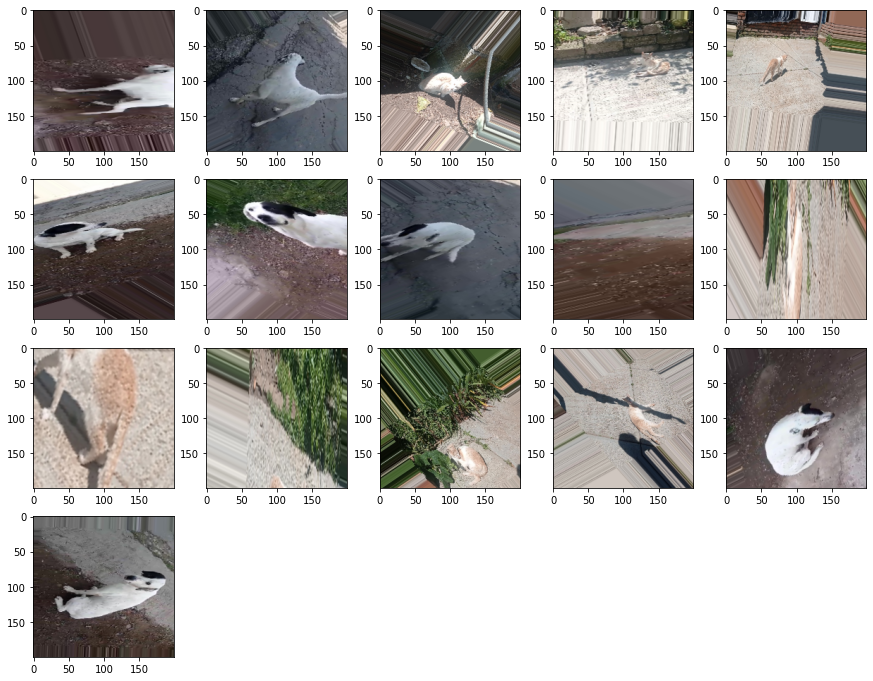

In [15]:
for imagen, etiqueta in entrenamiento_generator:
  plt.figure(figsize=(15,15))
  for i in range(16):
    plt.subplot(5,5,i+1)
    plt.imshow(imagen[i])
  break
plt.show()


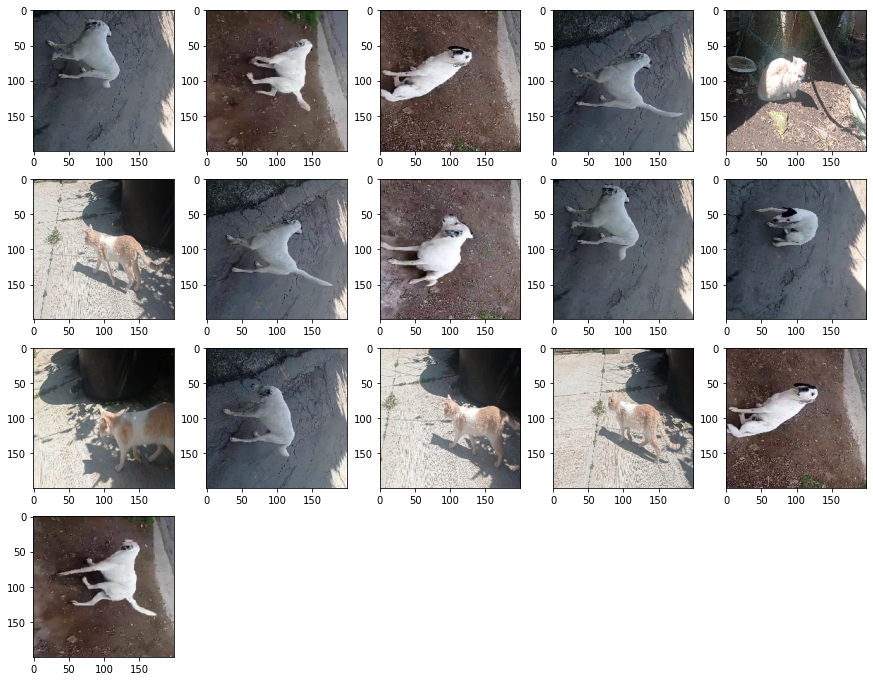

In [16]:
for imagen, etiqueta in prueba_generator:
  plt.figure(figsize=(15,15))
  for i in range(16):
    plt.subplot(5,5,i+1)
    plt.imshow(imagen[i])
  break
plt.show()

In [17]:
from tensorflow.keras.callbacks import TensorBoard

In [18]:
  modeloCNN_AD = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid')
  ])

In [ ]:
modeloCNN2_AD = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Flatten(),
  
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [19]:
modeloCNN_AD.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])


In [ ]:
modeloCNN2_AD.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

In [ ]:
#Entrenar el modelo
EPOCAS = 5

historial = modeloCNN_AD.fit(
    entrenamiento_generator, epochs=EPOCAS, batch_size=32,
    validation_split=0.15,
    validation_data=prueba_generator
)


Epoch 1/5


In [ ]:
EPOCAS = 5

historial2 = modeloCNN2_AD.fit(
    entrenamiento_generator, epochs=EPOCAS, batch_size=32,
    validation_split=0.15,
    validation_data=prueba_generator
)


Epoch 1/5
28/28 [==============================] - 41s 1s/step - loss: 0.5965 - accuracy: 0.6678 - val_loss: 0.5612 - val_accuracy: 0.6090
Epoch 2/5
28/28 [==============================] - 39s 1s/step - loss: 0.4439 - accuracy: 0.7832 - val_loss: 0.3258 - val_accuracy: 0.8466
Epoch 3/5
28/28 [==============================] - 41s 1s/step - loss: 0.3083 - accuracy: 0.8720 - val_loss: 0.3996 - val_accuracy: 0.8466
Epoch 4/5
28/28 [==============================] - 39s 1s/step - loss: 0.1332 - accuracy: 0.9469 - val_loss: 0.2251 - val_accuracy: 0.8939
Epoch 5/5
28/28 [==============================] - 39s 1s/step - loss: 0.1835 - accuracy: 0.9319 - val_loss: 0.1474 - val_accuracy: 0.9412


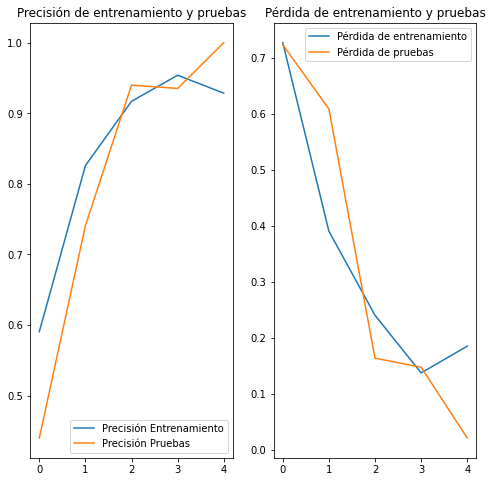

In [52]:
#Graficas de precisión
acc = historial.history['accuracy']
val_acc = historial.history['val_accuracy']

loss = historial.history['loss']
val_loss = historial.history['val_loss']

rango_epocas = range(5)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(rango_epocas, acc, label='Precisión Entrenamiento')
plt.plot(rango_epocas, val_acc, label='Precisión Pruebas')
plt.legend(loc='lower right')
plt.title('Precisión de entrenamiento y pruebas')

plt.subplot(1,2,2)
plt.plot(rango_epocas, loss, label='Pérdida de entrenamiento')
plt.plot(rango_epocas, val_loss, label='Pérdida de pruebas')
plt.legend(loc='upper right')
plt.title('Pérdida de entrenamiento y pruebas')
plt.show()

ValueError: ignored

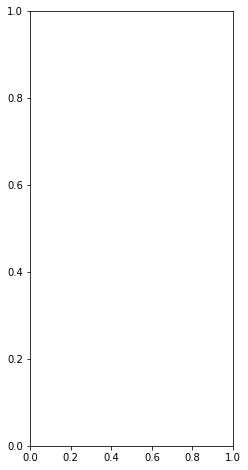

In [ ]:
#Graficas de precisión
acc = historial2.history['accuracy']
val_acc = historial2.history['val_accuracy']

loss = historial2.history['loss']
val_loss = historial2.history['val_loss']

rango_epocas = range(5)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(rango_epocas, acc, label='Precisión Entrenamiento')
plt.plot(rango_epocas, val_acc, label='Precisión Pruebas')
plt.legend(loc='lower right')
plt.title('Precisión de entrenamiento y pruebas')

plt.subplot(1,2,2)
plt.plot(rango_epocas, loss, label='Pérdida de entrenamiento')
plt.plot(rango_epocas, val_loss, label='Pérdida de pruebas')
plt.legend(loc='upper right')
plt.title('Pérdida de entrenamiento y pruebas')
plt.show()

In [53]:

from sklearn.metrics  import confusion_matrix


In [54]:
import cv2
import numpy as np


In [55]:
#Predict
y_prediction = modeloCNN_AD.predict(prueba_generator)



7/7 [==============================] - 4s 565ms/step


In [56]:
import cv2
import os

In [57]:
Clases = ['Garfield', 'Pecas']

In [118]:
y_norm = np.argmax(y_prediction, axis=-1)

In [119]:
y_norm

array([0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0])

In [120]:
len(y_norm)

216

In [121]:
ceros = 93
unos = 123

123 pecas y 93 garfield

In [122]:
y_true = np.random.randint(low=0, high=2, size=216, dtype=int)

In [123]:
print(y_true)

[0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1
 0 1 0 0 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 1
 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0
 1 0 0 1 1 1 1 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0 0 0
 0 1 0 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0]


In [124]:
gatos = 0 # se crea varaible perros inicializandola en 0
perros = 0

In [125]:
len(y_norm)
    

216

In [129]:
for temp in y_norm:
    if temp != 1:
        gatos +=1
        print(temp, gatos)
    else: 
        perros +=1
        print(temp, perros)

0 1
0 2
1 124
1 125
0 3
0 4
1 126
0 5
1 127
1 128
1 129
1 130
1 131
1 132
0 6
0 7
0 8
0 9
0 10
1 133
1 134
0 11
1 135
0 12
1 136
1 137
0 13
1 138
0 14
0 15
1 139
1 140
0 16
0 17
1 141
0 18
1 142
1 143
0 19
1 144
1 145
0 20
0 21
1 146
0 22
0 23
0 24
1 147
0 25
1 148
1 149
0 26
1 150
1 151
0 27
0 28
1 152
1 153
0 29
1 154
1 155
0 30
0 31
1 156
0 32
0 33
1 157
1 158
0 34
1 159
1 160
0 35
1 161
1 162
1 163
1 164
1 165
1 166
1 167
0 36
1 168
1 169
0 37
0 38
0 39
1 170
0 40
1 171
1 172
1 173
1 174
0 41
0 42
0 43
1 175
0 44
1 176
1 177
1 178
1 179
0 45
1 180
0 46
1 181
1 182
0 47
1 183
0 48
0 49
1 184
1 185
1 186
1 187
1 188
0 50
1 189
0 51
1 190
0 52
1 191
0 53
1 192
0 54
1 193
1 194
1 195
1 196
1 197
0 55
0 56
1 198
1 199
1 200
1 201
0 57
1 202
1 203
0 58
0 59
1 204
0 60
1 205
0 61
1 206
1 207
1 208
0 62
1 209
0 63
1 210
0 64
1 211
1 212
1 213
1 214
1 215
1 216
1 217
1 218
1 219
0 65
1 220
1 221
1 222
0 66
0 67
0 68
1 223
1 224
0 69
0 70
0 71
1 225
1 226
0 72
1 227
0 73
0 74
0 75
1 228
0 76

In [132]:
for temp in y_norm:
    if temp == 0:
        gatos +=1
        print(temp, gatos)
    if temp == 1:
        perros +=1
        print(temp, perros)

NameError: ignored

In [130]:
gatos

93

In [131]:
perros


246

In [ ]:
c_m = confusion_matrix(Clases, y_norm)

ValueError: ignored

In [ ]:
y_real= entrenamiento_generator

In [ ]:
testt = np.array(test)

In [ ]:
len(prueba_generator)

7

In [ ]:
len(y_prediction)

867

In [ ]:
from PIL import Image
import requests
from io import BytesIO
import cv2

In [105]:
img = cv2.imread('pecs.jpg')

In [106]:
gato = np.array(img).astype(float)/255

In [107]:
gato = cv2.resize(gato, (200,200))

In [108]:

prediccion = modeloCNN_AD.predict(gato.reshape(-1, 200, 200, 3))

1/1 [==============================] - 0s 19ms/step


In [109]:
print(str(prediccion))

[[0.79607266 0.22018827]]


In [110]:
y_norm2 = np.argmax(prediccion, axis=-1)
y_norm2

array([0])